# Data Analysis and Visualization Notebook

This Jupyter Notebook is dedicated to the analysis and visualization of customer data from the `DM2425_ABCDEats_DATASET.csv` file. The notebook includes various steps to clean, analyze, and visualize the data to extract meaningful insights.

## Table of Contents

1. **Importing Packages and Data**
    - Import necessary libraries such as `pandas`, `numpy`, `matplotlib.pyplot`, and `seaborn`.
    - Load the dataset into a DataFrame.

2. **Data Exploration**
    - Display the first few rows of the DataFrame.
    - Identify unique values in the `customer_region` column.
    - Calculate the number of rows lost by removing NaN values.
    - Summarize key statistics for the DataFrame.
    - Explore non-numerical columns and their unique values.

3. **Data Cleaning**
    - Replace specific values with NaN.
    - Drop rows with NaN values and compare the shape of the DataFrame before and after.

4. **Feature Engineering**
    - Create new features such as `delta_day_order`, `tot_value_cui`, `order_freq`, `value_freq`, and `avg_order_value`.
    - Append these new features to a list for further analysis.

5. **Data Validation**
    - Check for NaN and infinite values in the new features.
    - Describe the new features to understand their statistical properties.

6. **Age Analysis**
    - Summarize customer age statistics.
    - Visualize the distribution and impact of age on various metrics using violin plots and scatter plots.
    - Add error bars to scatter plots for better visualization.

7. **Region Analysis**
    - Analyze and visualize the impact of customer region on various metrics.
    - Create bar plots with error bars to show average values and their standard deviations across regions.
    - Summarize regional statistics in a DataFrame.

## Key Variables

- `df`: The main DataFrame containing the customer data.
- `noNaN_df`: DataFrame after removing rows with NaN values.
- `new_fetures_list`: List of newly engineered features.
- `region_stats`: DataFrame summarizing statistics for different regions.
- `age_order_freq`, `age_order_value_mean`, `age_value_freq`, etc.: DataFrames containing age-related metrics.
- `avg_age_per_region`, `avg_order_value_per_region`, etc.: Series containing region-related metrics.

This notebook provides a comprehensive analysis of customer data, focusing on age and region-specific insights, and employs various visualization techniques to present the findings effectively.

## importing packages and data


In [43]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns 


In [4]:
file_path = 'DM2425_ABCDEats_DATASET.csv'
df = pd.read_csv(file_path)
df.head()

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
0,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,...,0,0,0,0,2,0,0,0,0,0
1,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,...,0,0,0,0,0,0,0,0,0,0
2,f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,...,0,0,0,0,0,0,0,0,0,0
3,180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,...,1,0,0,0,0,0,0,0,0,0
4,4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df['customer_region'].unique()

array(['2360', '8670', '4660', '2440', '-', '4140', '2490', '8370',
       '8550'], dtype=object)

### how many rows do I looose by popping NANs?

In [6]:
31888 * 0.01

318.88

In [7]:
s1 = df.shape
s1

(31888, 56)

In [8]:
noNaN_df = df.dropna()
s2 = noNaN_df.shape

In [9]:
s1[0]-s2[0]

1968

## Summarise key statistics for the data frame

In [10]:
df.describe()

,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
count,31161.000000,31888.000000,31888.000000,31888.000000,31782.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,...,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000
mean,27.506499,3.102609,5.668245,2.818866,28.478604,63.675521,4.880438,9.960451,2.300633,0.801163,...,0.215630,0.277032,0.356435,0.390962,0.336961,0.245610,0.142812,0.071155,0.048263,0.045189
std,7.160898,2.771587,6.957287,3.977529,24.109086,23.226123,11.654018,23.564351,8.479734,6.427132,...,0.599006,0.738162,0.874449,0.943721,0.893949,0.795296,0.586529,0.348536,0.298265,0.282006
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,1.000000,2.000000,1.000000,7.000000,49.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.000000,3.000000,2.000000,22.000000,70.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,31.000000,4.000000,7.000000,3.000000,45.000000,83.000000,5.660000,11.830000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,80.000000,41.000000,269.000000,83.000000,90.000000,90.000000,280.210000,896.710000,229.220000,326.100000,...,13.000000,23.000000,22.000000,20.000000,24.000000,35.000000,36.000000,11.000000,15.000000,13.000000


In [11]:
non_numerical_columns = df.select_dtypes(include=['object']).columns.tolist()
print(non_numerical_columns)



['customer_id', 'customer_region', 'last_promo', 'payment_method']


In [12]:
for column in non_numerical_columns:
    print(column)
    print(df[column].unique())
    print('---------------------')

customer_id
['1b8f824d5e' '5d272b9dcb' 'f6d1b2ba63' ... 'f74ad8ce3f' 'f7b19c0241'
 'fd40d3b0e0']
---------------------
customer_region
['2360' '8670' '4660' '2440' '-' '4140' '2490' '8370' '8550']
---------------------
last_promo
['DELIVERY' 'DISCOUNT' '-' 'FREEBIE']
---------------------
payment_method
['DIGI' 'CASH' 'CARD']
---------------------


In [13]:
df['customer_region'].unique()
df.replace('-', np.nan, inplace=True)

In [14]:
df['customer_region'].unique()

array(['2360', '8670', '4660', '2440', nan, '4140', '2490', '8370',
       '8550'], dtype=object)

# adding new key figures

In [15]:
new_fetures_list = []
# shall I give different names to the new columns?

### delta_day_order
shows the time passed beween the first order and the last order
-- note:
we could adjust the parameter by using the highest day for the last order in the dataframe as today

In [16]:

df['delta_day_order'] = df['last_order'] - df['first_order'] + 1
new_fetures_list.append('delta_day_order')

### tot_value_cui
shows the total amunt of money spent on the app across all options

In [17]:
cui_columns = [col for col in df.columns if col.startswith('CUI')]
df['tot_value_cui'] = df[cui_columns].sum(axis=1)
new_fetures_list.append('tot_value_cui')

### frequencies and averages
more insightful informations about our customers habits

In [18]:
df['order_freq'] = df['product_count'] / df['delta_day_order']
df['value_freq'] = df['tot_value_cui'] / df['delta_day_order']
df['avg_order_value'] = df['tot_value_cui'] / df['product_count']

new_fetures_list.append('order_freq')
new_fetures_list.append('value_freq')
new_fetures_list.append('avg_order_value')

In [19]:
df['avg_order_value'] = np.where(df['product_count'] != 0, df['tot_value_cui'] / df['product_count'], 0)

### our new features

### check if I made a mess

In [20]:
nan_inf_counts_list = []

for new_feture in new_fetures_list:
    nan_count = df[new_feture].isna().sum()
    inf_count = df[new_feture].isin([np.inf, -np.inf]).sum()
    nan_inf_counts = {
        'feature:': new_feture,
        'nan_count': nan_count,
        'inf_count': inf_count
    }
    
    nan_inf_counts_list.append((new_feture, nan_count, inf_count))
    
df_naninf = pd.DataFrame( nan_inf_counts_list)
df_naninf

,0,1,2
0,delta_day_order,106,0
1,tot_value_cui,0,0
2,order_freq,106,0
3,value_freq,106,0
4,avg_order_value,0,0


In [21]:
df[new_fetures_list].describe()

,delta_day_order,tot_value_cui,order_freq,value_freq,avg_order_value
count,31782.000000,31888.000000,31782.000000,31782.000000,31888.000000
mean,36.409288,38.303043,0.471221,4.326917,7.538017
std,29.417128,46.412121,0.649079,8.002206,4.077059
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,12.887500,0.093333,0.530891,4.093646
50%,35.000000,24.140000,0.171053,1.124325,6.907083
75%,63.000000,44.990000,0.666667,3.729853,10.127569
max,91.000000,1418.330000,14.000000,141.120000,24.390000


# focus on  age

In [22]:
df['customer_age'].describe()

count    31161.000000
mean        27.506499
std          7.160898
min         15.000000
25%         23.000000
50%         26.000000
75%         31.000000
max         80.000000
Name: customer_age, dtype: float64

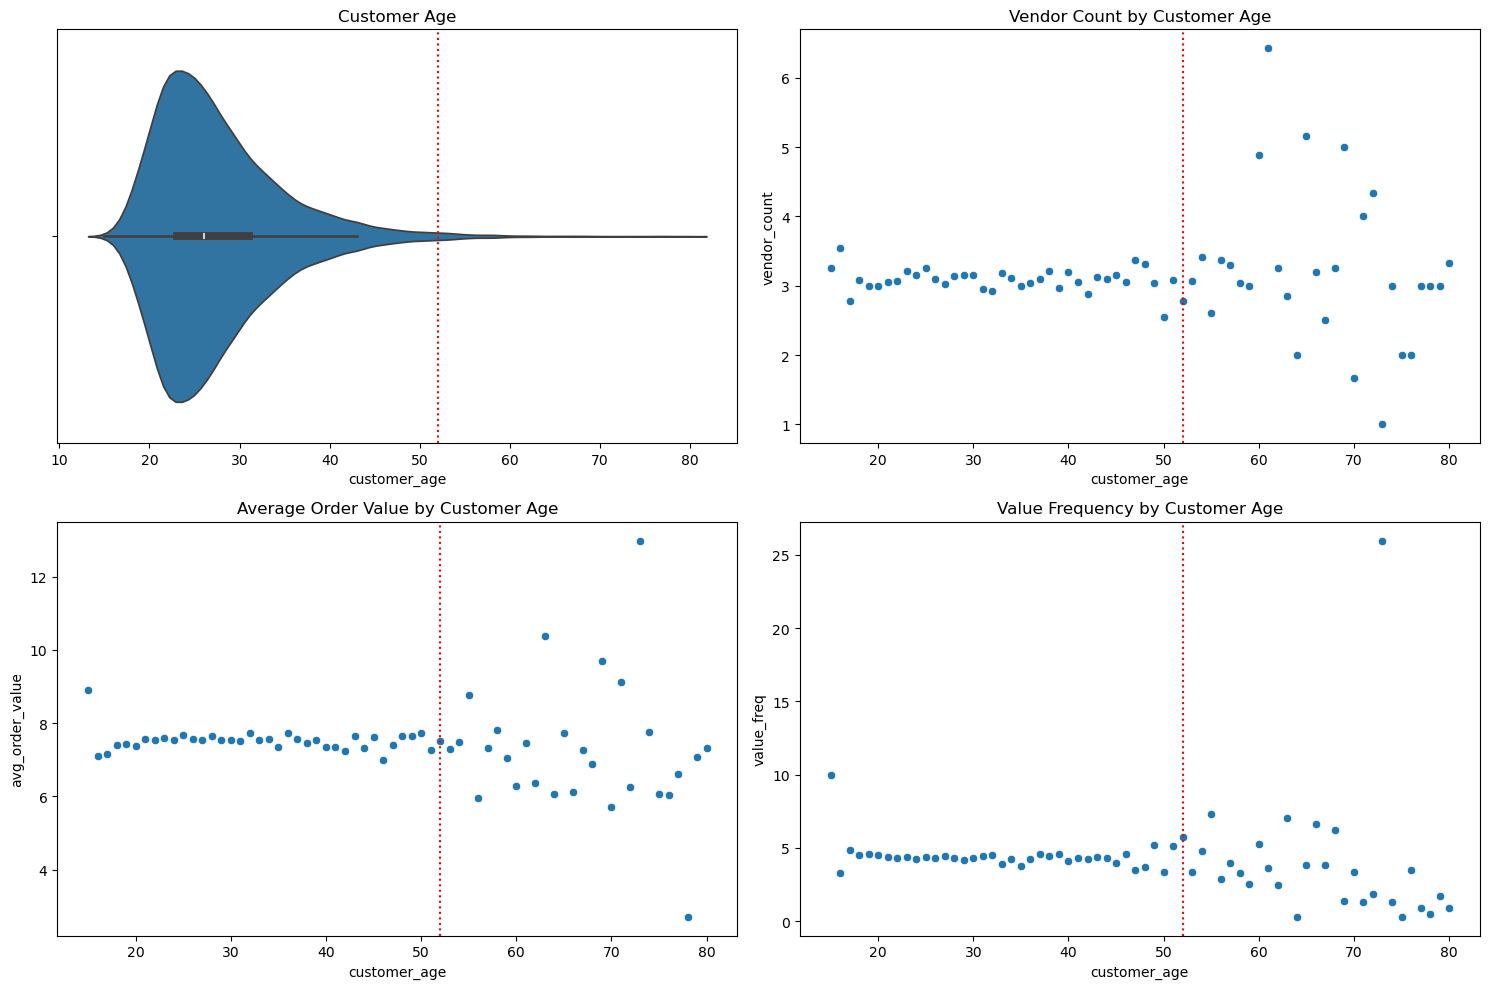

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.violinplot(data=df, x='customer_age', ax=axes[0, 0])
percentile_99 = df['customer_age'].quantile(0.99)
axes[0, 0].axvline(percentile_99, color='red', linestyle='dotted')
axes[0, 0].set_title('Customer Age')

age_vendor_mean = df.groupby('customer_age')['vendor_count'].mean().reset_index()
sns.scatterplot(data=age_vendor_mean, x='customer_age', y='vendor_count', ax=axes[0, 1])
axes[0, 1].axvline(percentile_99, color='red', linestyle='dotted')
axes[0, 1].set_title('Vendor Count by Customer Age')

age_order_value_mean = df.groupby('customer_age')['avg_order_value'].mean().reset_index()
sns.scatterplot(data=age_order_value_mean, x='customer_age', y='avg_order_value', ax=axes[1, 0])
axes[1, 0].axvline(percentile_99, color='red', linestyle='dotted')
axes[1, 0].set_title('Average Order Value by Customer Age')

age_value_freq = df.groupby('customer_age')['value_freq'].mean().reset_index()
sns.scatterplot(data=age_value_freq, x='customer_age', y='value_freq', ax=axes[1, 1])
axes[1, 1].axvline(percentile_99, color='red', linestyle='dotted')
axes[1, 1].set_title('Value Frequency by Customer Age')

plt.tight_layout()
plt.show()

The customer age distribution leans heavily towards the younger demographic. This can lead to potential misinterpretations when analyzing the visual representation of our data. It's crucial to remember that 99% of our customer base is under 52, which explains the more scattered results for the remaining 1% of our graph.

The insights we can glean from these charts are that nearly 99% of our user base is younger than 50, but age does not appear to significantly influence spending frequency or habit


????? can I use a regression to corroborate my thesis?

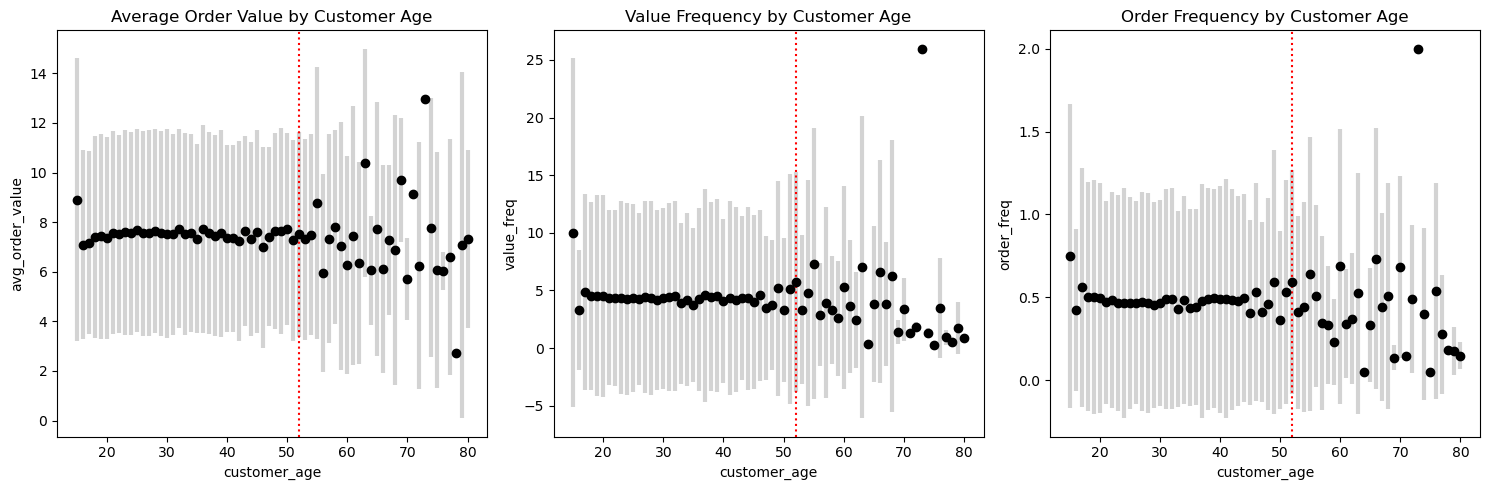

In [29]:
# show the last 3 scatterplots og the previous figure with error bars
fig, axes = plt.subplots(1, 3, figsize=(15, 5))




age_order_value_mean = df.groupby('customer_age')['avg_order_value'].mean().reset_index()
age_order_value_std = df.groupby('customer_age')['avg_order_value'].std().reset_index()
sns.scatterplot(data=age_order_value_mean, x='customer_age', y='avg_order_value', ax=axes[0])

axes[0].errorbar(age_order_value_mean['customer_age'], age_order_value_mean['avg_order_value'], yerr=age_order_value_std['avg_order_value'], fmt='o', color='black', ecolor='lightgray', elinewidth=3, capsize=0)
axes[0].axvline(percentile_99, color='red', linestyle='dotted')
axes[0].set_title('Average Order Value by Customer Age')

age_value_freq = df.groupby('customer_age')['value_freq'].mean().reset_index()
age_value_freq_std = df.groupby('customer_age')['value_freq'].std().reset_index()
sns.scatterplot(data=age_value_freq, x='customer_age', y='value_freq', ax=axes[1])
axes[1].errorbar(age_value_freq['customer_age'], age_value_freq['value_freq'], yerr=age_value_freq_std['value_freq'], fmt='o', color='black', ecolor='lightgray', elinewidth=3, capsize=0)

axes[1].axvline(percentile_99, color='red', linestyle='dotted')
axes[1].set_title('Value Frequency by Customer Age')

age_order_freq = df.groupby('customer_age')['order_freq'].mean().reset_index()
age_order_freq_std = df.groupby('customer_age')['order_freq'].std().reset_index()
sns.scatterplot(data=age_order_freq, x='customer_age', y='order_freq', ax=axes[2])
axes[2].errorbar(age_order_freq['customer_age'], age_order_freq['order_freq'], yerr=age_order_freq_std['order_freq'], fmt='o', color='black', ecolor='lightgray', elinewidth=3, capsize=0)

axes[2].axvline(percentile_99, color='red', linestyle='dotted')
axes[2].set_title('Order Frequency by Customer Age')

plt.tight_layout()
plt.show()


# focus on Region Identifier

In [40]:
df_stat_new_features_region = []
for feature in new_fetures_list:
    #min
    min_feature_region = df.groupby('customer_region')[feature].min()
    #max
    max_feature_region = df.groupby('customer_region')[feature].max()
    #mean
    avg_feature_region = df.groupby('customer_region')[feature].mean()
    #std
    std_feature_region = df.groupby('customer_region')[feature].std()

    dict_feature_region = {
        'name': feature,
        'min': min_feature_region,
        'max': max_feature_region,
        'mean': avg_feature_region,
        'std': std_feature_region
    }
    df_stat_new_features_region.append((feature, pd.DataFrame(dict_feature_region)))
print(df_stat_new_features_region)
   

[('delta_day_order',                             name  min   max       mean        std
customer_region                                                  
2360             delta_day_order  1.0  91.0  39.240404  29.557720
2440             delta_day_order  1.0  90.0  40.487145  29.360105
2490             delta_day_order  1.0  90.0  38.256180  29.277286
4140             delta_day_order  1.0  90.0  29.806075  28.290965
4660             delta_day_order  1.0  90.0  38.042314  29.858081
8370             delta_day_order  1.0  90.0  25.878543  27.369929
8550             delta_day_order  1.0  88.0  22.692308  30.372052
8670             delta_day_order  1.0  90.0  32.955013  28.467725), ('tot_value_cui',                           name    min      max       mean        std
customer_region                                                     
2360             tot_value_cui   0.37  1418.33  23.750054  33.900924
2440             tot_value_cui   0.86   297.15  21.858382  24.645735
2490             tot_va

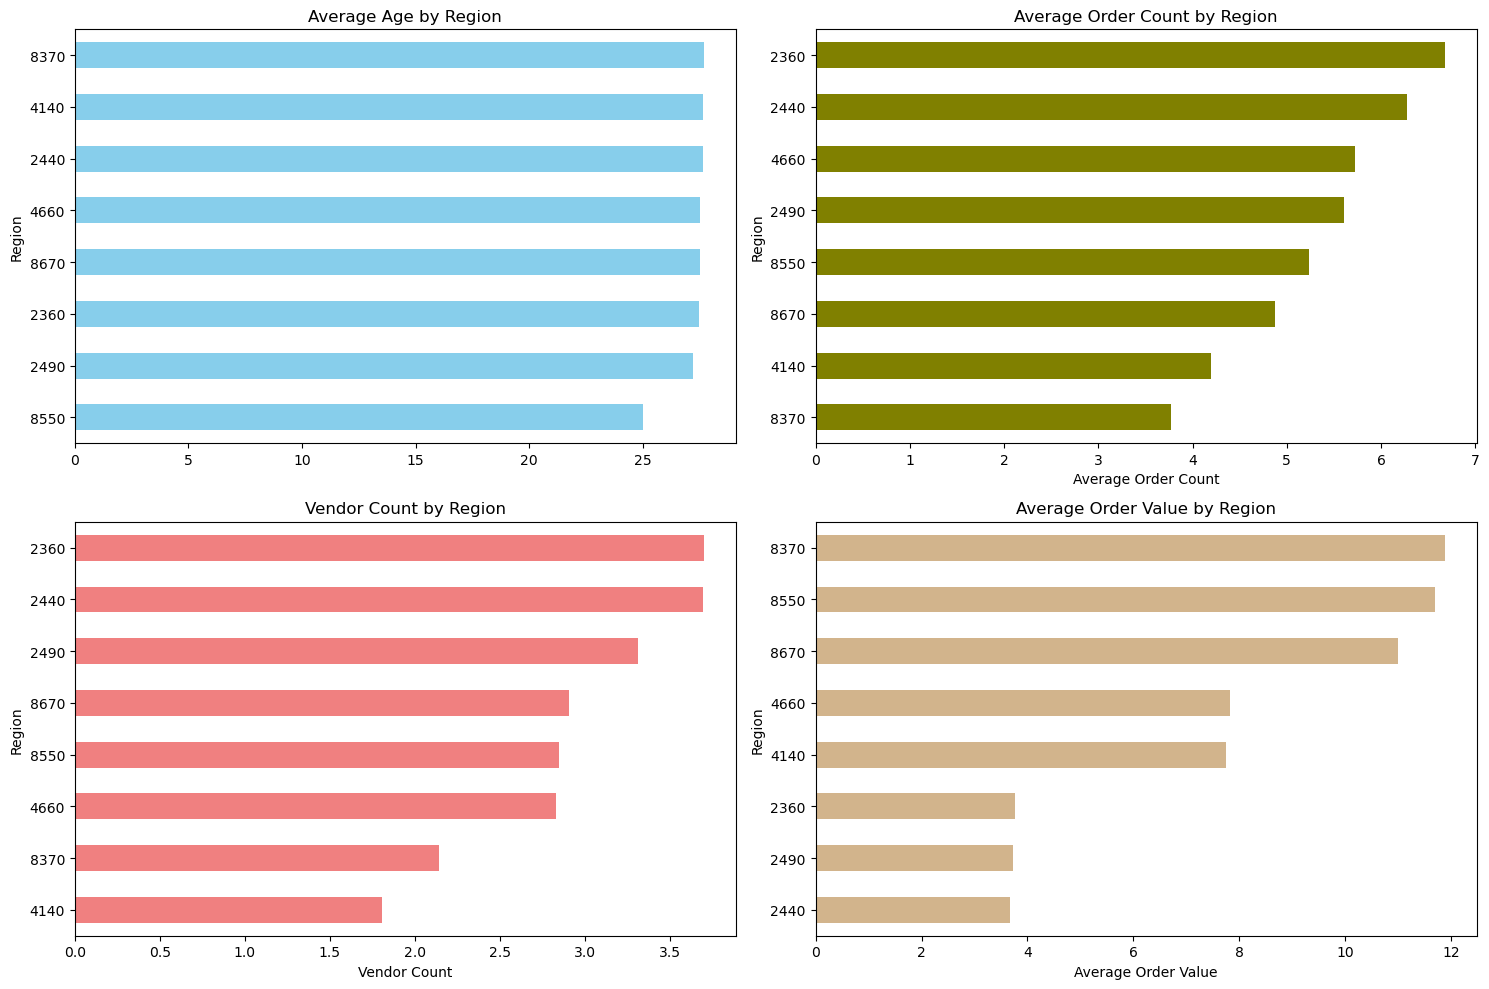

In [30]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

avg_age_per_region = df.groupby('customer_region')['customer_age'].mean().sort_values()
avg_age_per_region.plot(kind='barh', x='customer_age', y='region name', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Average Age by Region')
axes[0, 0].set_ylabel(' Average Customer Age')
axes[0, 0].set_ylabel('Region')

# Plot 2: Average Order Count by Region
avg_order_count_per_region = df.groupby('customer_region')['product_count'].mean().sort_values()
avg_order_count_per_region.plot(kind='barh', x='order_count', y='region name', ax=axes[0, 1], color='olive')
axes[0, 1].set_title('Average Order Count by Region')
axes[0, 1].set_xlabel('Average Order Count')
axes[0, 1].set_ylabel('Region')

# Plot 3: Vendor Count by Region
vendor_count_per_region = df.groupby('customer_region')['vendor_count'].mean().sort_values()
vendor_count_per_region.plot(kind='barh', x='vendor_count', y='region name', ax=axes[1, 0], color='lightcoral')
axes[1, 0].set_title('Vendor Count by Region')
axes[1, 0].set_xlabel('Vendor Count')
axes[1, 0].set_ylabel('Region')

# Plot 4: Average Order Value by Region
avg_order_value_per_region = df.groupby('customer_region')['avg_order_value'].mean().sort_values()
avg_order_value_per_region.plot(kind='barh', x='order_value', y='region name', ax=axes[1, 1], color='tan')
axes[1, 1].set_title('Average Order Value by Region')
axes[1, 1].set_xlabel('Average Order Value')
axes[1, 1].set_ylabel('Region')

# Display the plots    
plt.tight_layout()
plt.show()

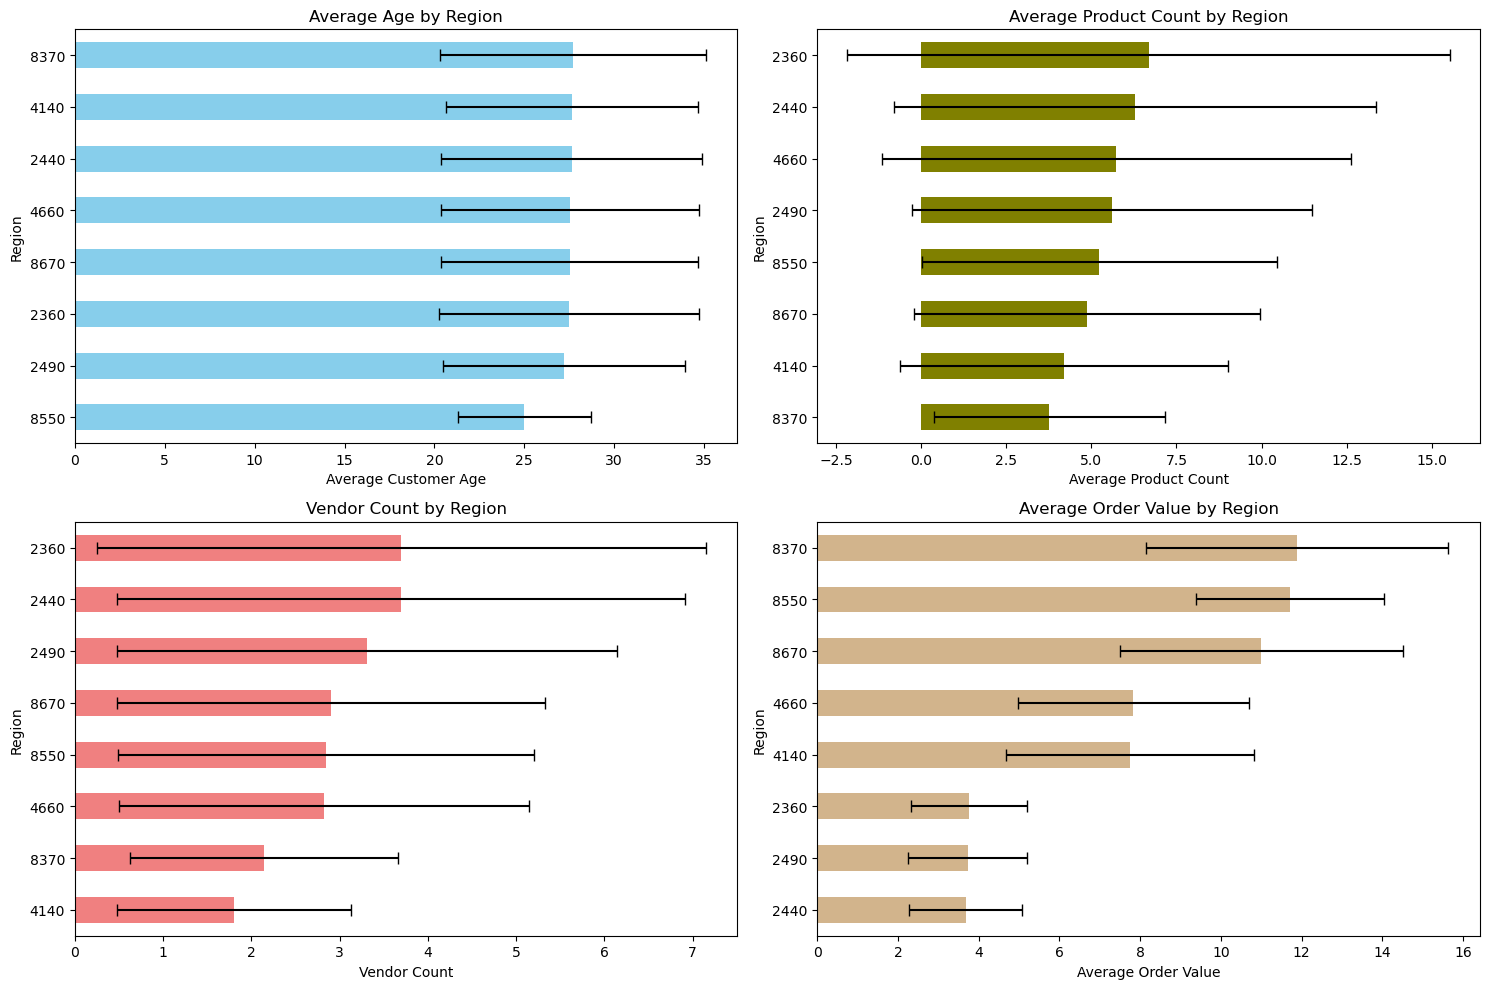

In [34]:
import matplotlib.pyplot as plt 
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Average Age by Region with Error Bars
avg_age_per_region = df.groupby('customer_region')['customer_age'].mean().sort_values()
std_age_per_region = df.groupby('customer_region')['customer_age'].std().sort_values()
avg_age_per_region.plot(kind='barh', xerr=std_age_per_region, ax=axes[0, 0], color='skyblue', capsize=4)
axes[0, 0].set_title('Average Age by Region')
axes[0, 0].set_xlabel('Average Customer Age')
axes[0, 0].set_ylabel('Region')

# Plot 2: Average Order Count by Region with Error Bars
avg_order_count_per_region = df.groupby('customer_region')['product_count'].mean().sort_values()
std_order_count_per_region = df.groupby('customer_region')['product_count'].std().sort_values()
avg_order_count_per_region.plot(kind='barh', xerr=std_order_count_per_region, ax=axes[0, 1], color='olive', capsize=4)
axes[0, 1].set_title('Average Product Count by Region')
axes[0, 1].set_xlabel('Average Product Count')
axes[0, 1].set_ylabel('Region')

# Plot 3: Vendor Count by Region with Error Bars
vendor_count_per_region = df.groupby('customer_region')['vendor_count'].mean().sort_values()
std_vendor_count_per_region = df.groupby('customer_region')['vendor_count'].std().sort_values()
vendor_count_per_region.plot(kind='barh', xerr=std_vendor_count_per_region, ax=axes[1, 0], color='lightcoral', capsize=4)
axes[1, 0].set_title('Vendor Count by Region')
axes[1, 0].set_xlabel('Vendor Count')
axes[1, 0].set_ylabel('Region')

# Plot 4: Average Order Value by Region with Error Bars
avg_order_value_per_region = df.groupby('customer_region')['avg_order_value'].mean().sort_values()
std_order_value_per_region = df.groupby('customer_region')['avg_order_value'].std().sort_values()
avg_order_value_per_region.plot(kind='barh', xerr=std_order_value_per_region, ax=axes[1, 1], color='tan', capsize=4)
axes[1, 1].set_title('Average Order Value by Region')
axes[1, 1].set_xlabel('Average Order Value')
axes[1, 1].set_ylabel('Region')

# Display the plots    
plt.tight_layout()
plt.show()

In [42]:
# Create a DataFrame to store the region statistics
region_stats = pd.DataFrame({
    'Region': avg_age_per_region.index,
    'Average Age': avg_age_per_region.values,
    'Standard Deviation': std_age_per_region.values,
    'Max Age': df.groupby('customer_region')['customer_age'].max().values,
    'Min Age': df.groupby('customer_region')['customer_age'].min().values
})

region_stats
# Add statistics for other features to region_stats
region_stats['Average Order Value'] = df.groupby('customer_region')['avg_order_value'].mean().values
region_stats['Order Value Std Dev'] = df.groupby('customer_region')['avg_order_value'].std().values
region_stats['Max Order Value'] = df.groupby('customer_region')['avg_order_value'].max().values
region_stats['Min Order Value'] = df.groupby('customer_region')['avg_order_value'].min().values

region_stats['Average Order Frequency'] = df.groupby('customer_region')['order_freq'].mean().values
region_stats['Order Frequency Std Dev'] = df.groupby('customer_region')['order_freq'].std().values
region_stats['Max Order Frequency'] = df.groupby('customer_region')['order_freq'].max().values
region_stats['Min Order Frequency'] = df.groupby('customer_region')['order_freq'].min().values

region_stats['Average Value Frequency'] = df.groupby('customer_region')['value_freq'].mean().values
region_stats['Value Frequency Std Dev'] = df.groupby('customer_region')['value_freq'].std().values
region_stats['Max Value Frequency'] = df.groupby('customer_region')['value_freq'].max().values
region_stats['Min Value Frequency'] = df.groupby('customer_region')['value_freq'].min().values


,Region,Average Age,Standard Deviation,Max Age,Min Age,Average Order Value,Order Value Std Dev,Max Order Value,Min Order Value,Average Order Frequency,Order Frequency Std Dev,Max Order Frequency,Min Order Frequency,Average Value Frequency,Value Frequency Std Dev,Max Value Frequency,Min Value Frequency
0,8550,25.000000,3.687818,79.0,15.0,3.764555,1.443437,14.120,0.370000,0.430846,0.599081,14.0,0.022727,1.901549,3.382680,113.91,0.032326
1,2490,27.194064,6.727876,72.0,15.0,3.673005,1.396405,13.590,0.860000,0.415358,0.577954,5.0,0.025974,1.774351,3.004605,23.16,0.038627
2,2360,27.474620,6.982325,56.0,16.0,3.722049,1.464880,9.600,0.500000,0.401917,0.535489,4.0,0.026667,1.762701,3.035747,23.20,0.043333
3,8670,27.514929,7.131813,58.0,16.0,7.745403,3.074347,23.180,1.350000,0.524913,0.614257,3.0,0.022472,4.647149,6.447416,38.85,0.077818
4,4660,27.525177,7.178560,80.0,15.0,7.826268,2.861322,24.390,0.000000,0.438392,0.581734,6.0,0.000000,3.970355,6.225582,78.94,0.062187
5,2440,27.633793,7.216229,68.0,15.0,11.895284,3.742394,19.870,0.500000,0.670886,0.744507,4.0,0.023810,9.183421,11.814931,67.07,0.163467
6,4140,27.650299,7.247690,31.0,18.0,11.707618,2.322328,15.785,8.493636,1.079350,1.121723,4.0,0.086957,14.018797,15.972886,55.66,0.804348
7,8370,27.708678,7.389199,80.0,15.0,10.999279,3.506252,22.140,0.000000,0.528366,0.740544,9.0,0.000000,6.895302,11.137912,121.64,0.000000


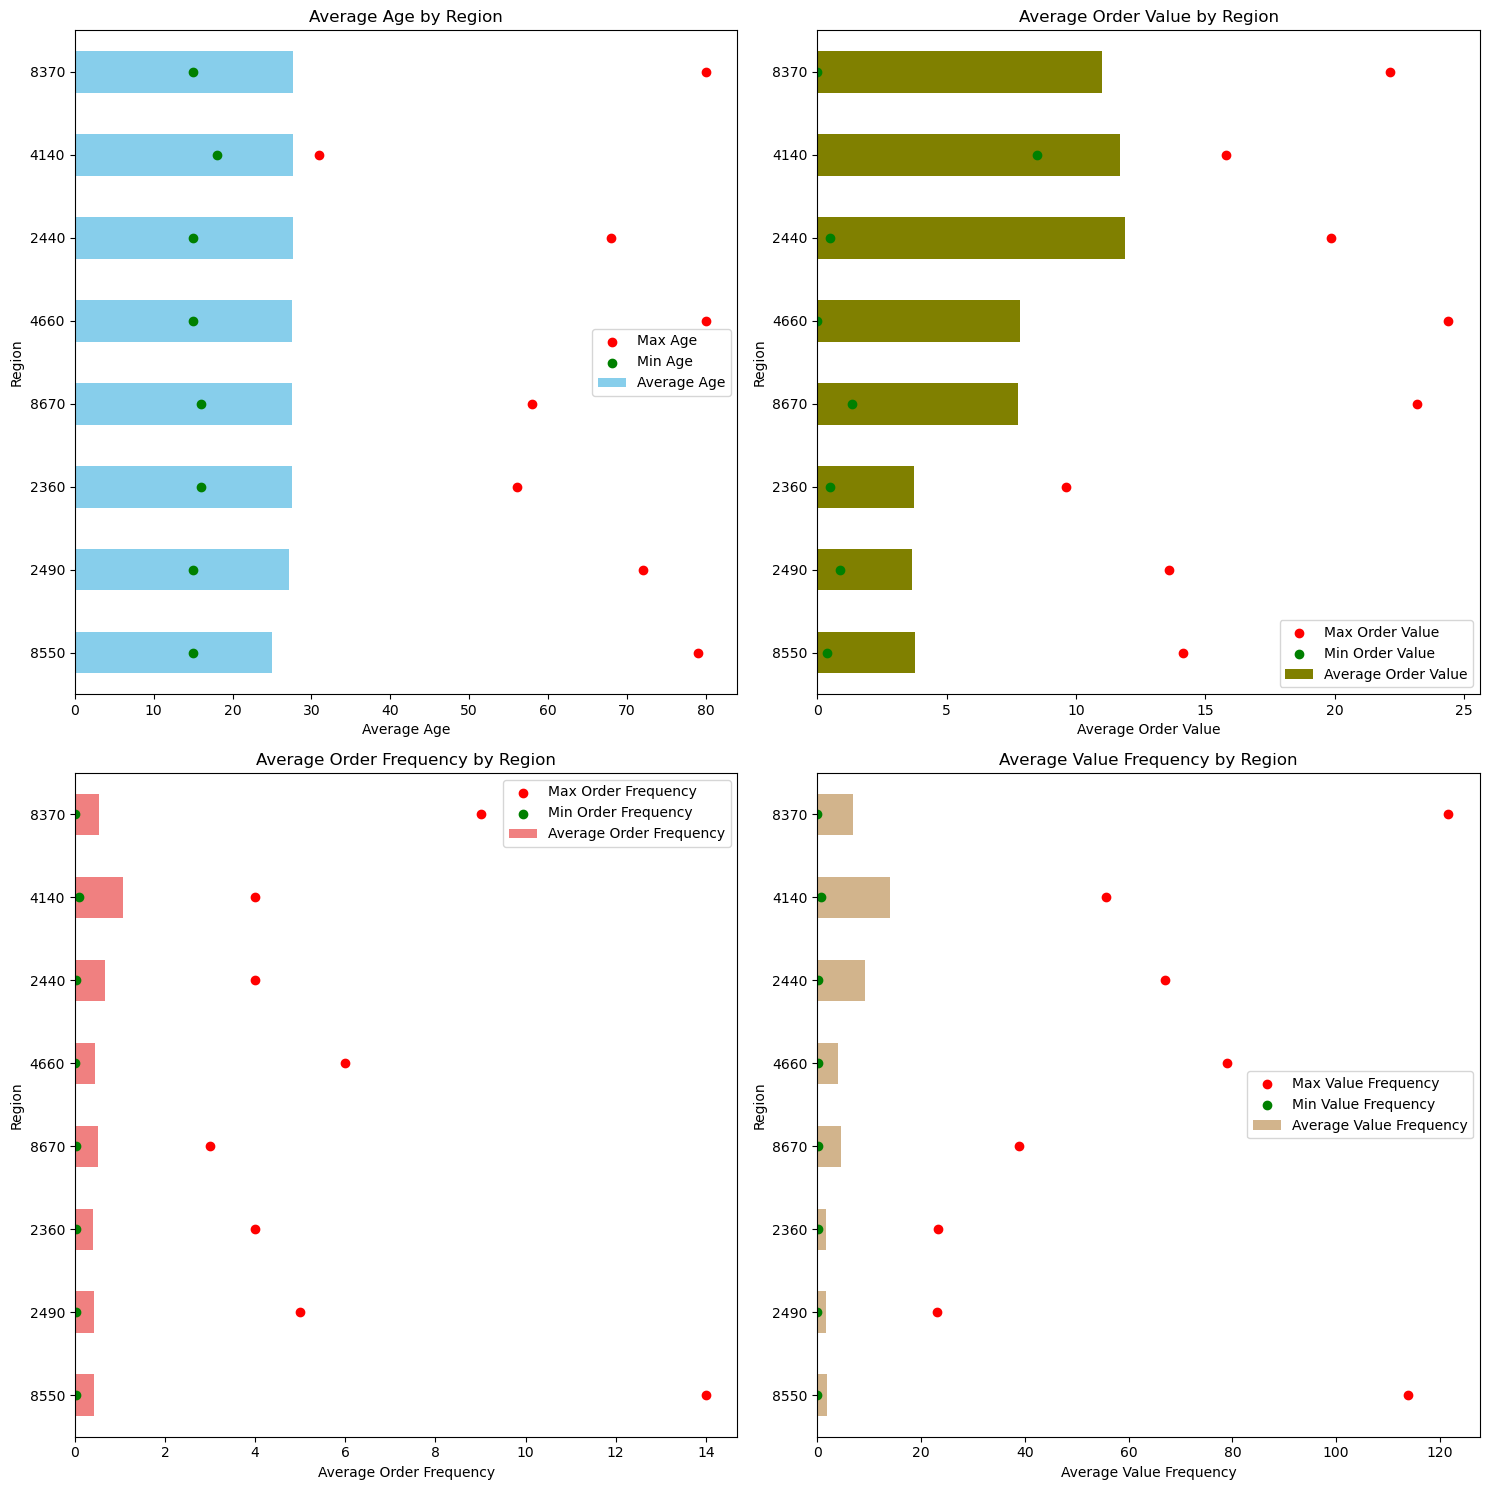

In [44]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

# Plot 1: Average Age by Region with max and min age
region_stats.plot(kind='barh', x='Region', y='Average Age', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Average Age by Region')
axes[0, 0].set_xlabel('Average Age')
axes[0, 0].set_ylabel('Region')
axes[0, 0].scatter(region_stats['Max Age'], region_stats['Region'], color='red', label='Max Age')
axes[0, 0].scatter(region_stats['Min Age'], region_stats['Region'], color='green', label='Min Age')
axes[0, 0].legend()

# Plot 2: Average Order Value by Region with max and min order value
region_stats.plot(kind='barh', x='Region', y='Average Order Value', ax=axes[0, 1], color='olive')
axes[0, 1].set_title('Average Order Value by Region')
axes[0, 1].set_xlabel('Average Order Value')
axes[0, 1].set_ylabel('Region')
axes[0, 1].scatter(region_stats['Max Order Value'], region_stats['Region'], color='red', label='Max Order Value')
axes[0, 1].scatter(region_stats['Min Order Value'], region_stats['Region'], color='green', label='Min Order Value')
axes[0, 1].legend()

# Plot 3: Average Order Frequency by Region with max and min order frequency
region_stats.plot(kind='barh', x='Region', y='Average Order Frequency', ax=axes[1, 0], color='lightcoral')
axes[1, 0].set_title('Average Order Frequency by Region')
axes[1, 0].set_xlabel('Average Order Frequency')
axes[1, 0].set_ylabel('Region')
axes[1, 0].scatter(region_stats['Max Order Frequency'], region_stats['Region'], color='red', label='Max Order Frequency')
axes[1, 0].scatter(region_stats['Min Order Frequency'], region_stats['Region'], color='green', label='Min Order Frequency')
axes[1, 0].legend()

# Plot 4: Average Value Frequency by Region with max and min value frequency    
region_stats.plot(kind='barh', x='Region', y='Average Value Frequency', ax=axes[1, 1], color='tan')
axes[1, 1].set_title('Average Value Frequency by Region')
axes[1, 1].set_xlabel('Average Value Frequency')
axes[1, 1].set_ylabel('Region')
axes[1, 1].scatter(region_stats['Max Value Frequency'], region_stats['Region'], color='red', label='Max Value Frequency')
axes[1, 1].scatter(region_stats['Min Value Frequency'], region_stats['Region'], color='green', label='Min Value Frequency')
axes[1, 1].legend()

# Display the plots
plt.tight_layout()
plt.show()


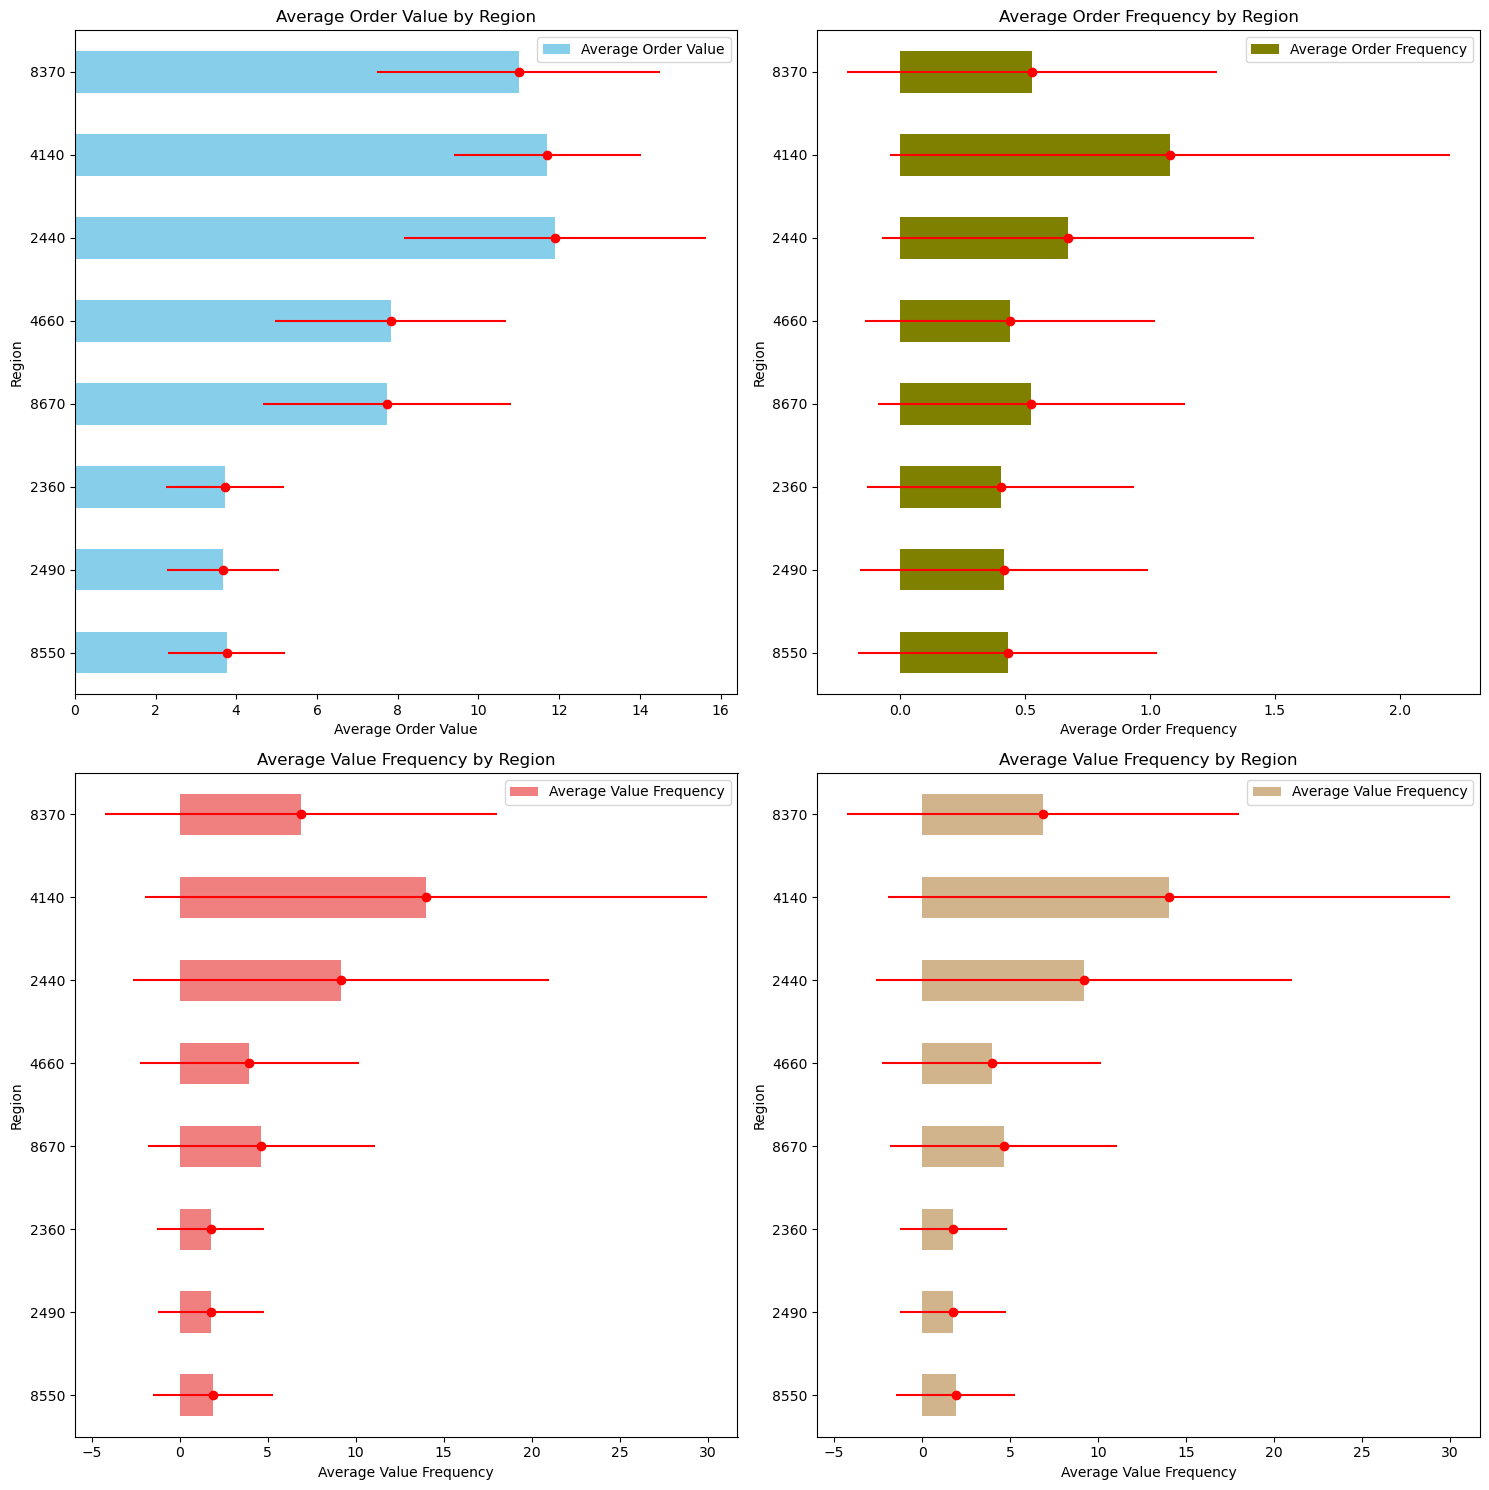

In [45]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

# Plot 1: Average Order Value by Region with standard deviation
region_stats.plot(kind='barh', x='Region', y='Average Order Value', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Average Order Value by Region')
axes[0, 0].set_xlabel('Average Order Value')
axes[0, 0].set_ylabel('Region')
axes[0, 0].errorbar(region_stats['Average Order Value'], region_stats['Region'], xerr=region_stats['Order Value Std Dev'], fmt='o', color='red')

# Plot 2: Average Order Frequency by Region with standard deviation
region_stats.plot(kind='barh', x='Region', y='Average Order Frequency', ax=axes[0, 1], color='olive')
axes[0, 1].set_title('Average Order Frequency by Region')
axes[0, 1].set_xlabel('Average Order Frequency')
axes[0, 1].set_ylabel('Region')
axes[0, 1].errorbar(region_stats['Average Order Frequency'], region_stats['Region'], xerr=region_stats['Order Frequency Std Dev'], fmt='o', color='red')

# Plot 3: Average Value Frequency by Region with standard deviation
region_stats.plot(kind='barh', x='Region', y='Average Value Frequency', ax=axes[1, 0], color='lightcoral')
axes[1, 0].set_title('Average Value Frequency by Region')
axes[1, 0].set_xlabel('Average Value Frequency')
axes[1, 0].set_ylabel('Region')
axes[1, 0].errorbar(region_stats['Average Value Frequency'], region_stats['Region'], xerr=region_stats['Value Frequency Std Dev'], fmt='o', color='red')

# Plot 4: Average Value Frequency by Region with standard deviation
region_stats.plot(kind='barh', x='Region', y='Average Value Frequency', ax=axes[1, 1], color='tan')
axes[1, 1].set_title('Average Value Frequency by Region')
axes[1, 1].set_xlabel('Average Value Frequency')
axes[1, 1].set_ylabel('Region')
axes[1, 1].errorbar(region_stats['Average Value Frequency'], region_stats['Region'], xerr=region_stats['Value Frequency Std Dev'], fmt='o', color='red')

# Display the plots
plt.tight_layout()
plt.show()


# 